REGION                                     int64
EDAD_SEL                                   int64
SEXO_SEL                                   int64
BHCH07_SEL                                 int64
NIVEL_EDUCATIVO_AGRUPADO                   int64
CONDICION_ACTIVIDAD                        int64
BHCH14_01_SEL                            float64
CANT_MIEMBROS_HOGAR                        int64
CANT_PERSONASHASTA13                       int64
CANT_PERSONAS14A64                         int64
CANT_PERSONAS65YMAS                        int64
CANT_DEMANDANTES_TOTAL                     int64
CANT_NODEMANDANTES_TOTAL                   int64
CANT_DEMANDANTES_14A64                     int64
CANT_DEMANDANTES_65YMAS                    int64
TIPO_HOGAR_DCTOTAL                         int64
TIPO_HOGAR_DCHASTA13                       int64
TIPO_HOGAR_DC14YMAS                        int64
TIPO_HOGAR_DCAMBOS                         int64
TIPO_HOGAR_DCPOREDAD                     float64
BHSL11_SEL          

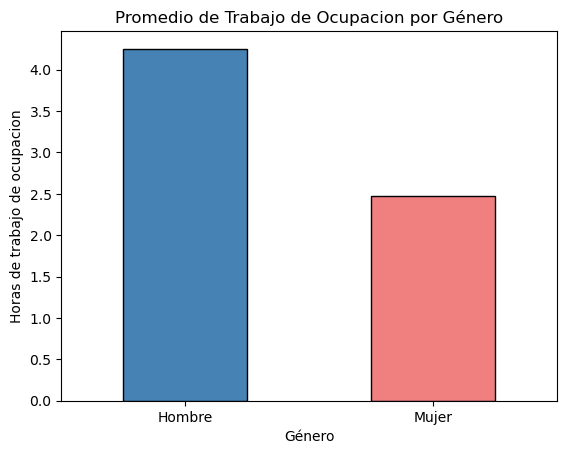

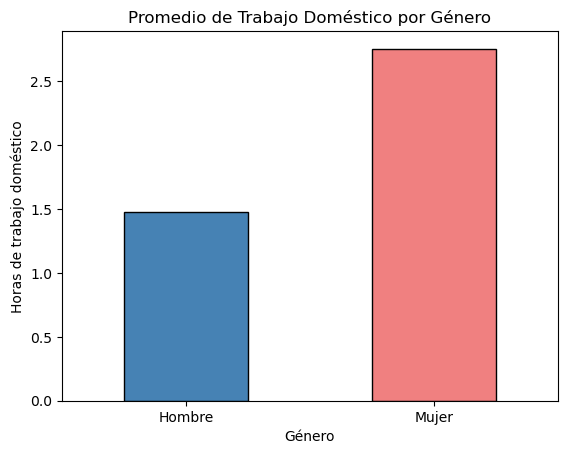

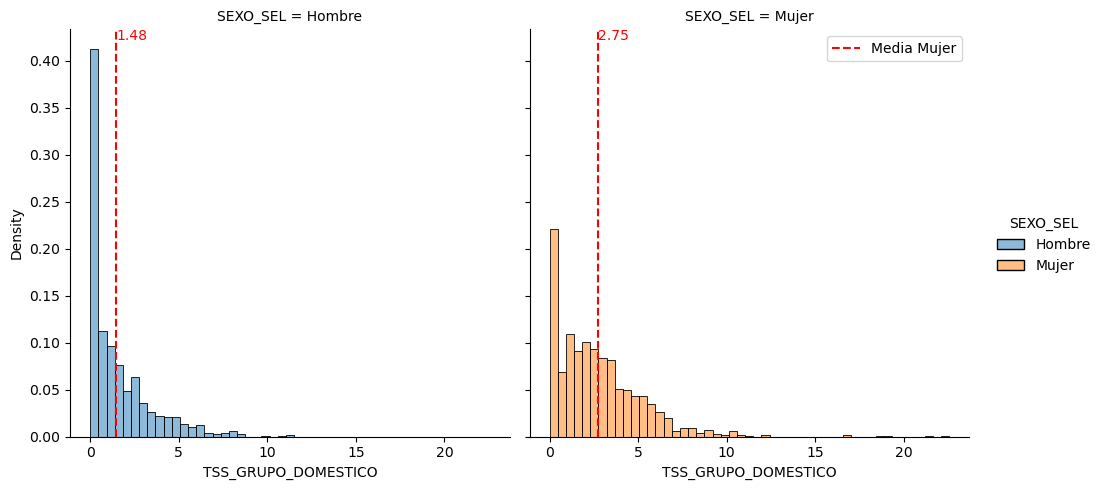

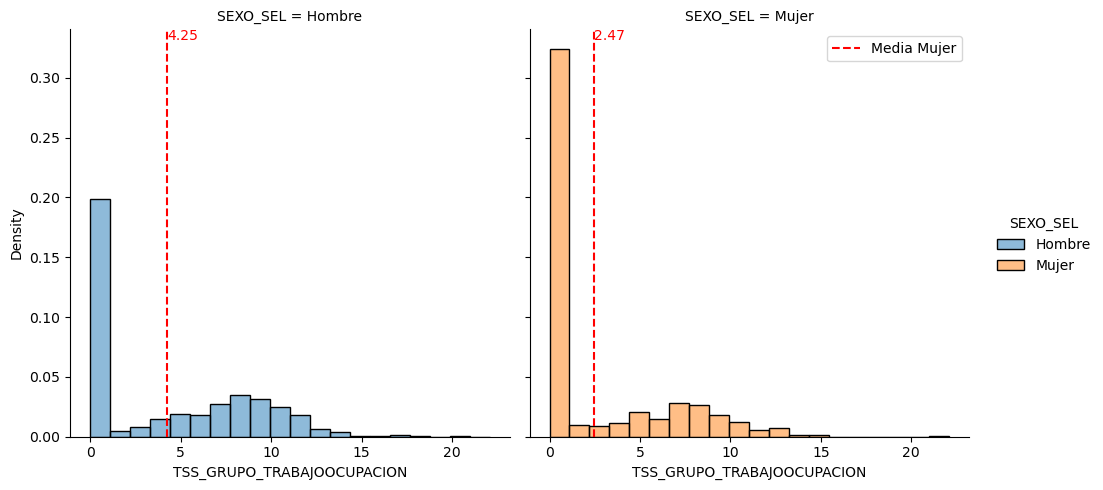

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

df= pd.read_excel("enut2021_base.xlsx")
df_1= df.copy()

# Definimos las variables de interes 
variables_de_interes = ['REGION','EDAD_SEL','SEXO_SEL','BHCH07_SEL','NIVEL_EDUCATIVO_AGRUPADO','CONDICION_ACTIVIDAD',
                        "BHCH14_01_SEL","CANT_MIEMBROS_HOGAR","CANT_PERSONASHASTA13", "CANT_PERSONAS14A64","CANT_PERSONAS65YMAS","CANT_DEMANDANTES_TOTAL",
                        "CANT_NODEMANDANTES_TOTAL","CANT_DEMANDANTES_14A64","CANT_DEMANDANTES_65YMAS","TIPO_HOGAR_DCTOTAL","TIPO_HOGAR_DCHASTA13",
                        "TIPO_HOGAR_DC14YMAS","TIPO_HOGAR_DCAMBOS","TIPO_HOGAR_DCPOREDAD","BHSL11_SEL","BHSL12_SEL","MAYORESACARGO_TOTAL","MAYORES_CUIDADO_PAGO",
                        "T_DOMESTICO_OTROFAMILIAR","T_DOMESTICO_SINPAGO","T_DOMESTICO_PAGO","T_DOMESTICO_MIEMBROS",
                        'TP_GRUPO_DOMESTICO','TP_GRUPO_CUIDADO','TSS_GRUPO_TRABAJOOCUPACION','TSS_GRANGRUPO_TNR','TSS_GRUPO_DOMESTICO','TSS_GRUPO_CUIDADO','TSS_GRUPO_CUIDADOPERSONAL','TSS_GRUPO_TNROTROSHOGARES_VOLUNTARIAS','TSS_GRUPO_VOLUNTARIAS','TSS_GRUPO_EDUCACION','TSS_GRUPO_CONVIVENCIA','TSS_GRUPO_USODEMEDIOS','TSS_GRUPO_CPERSONALSINDORMIR','TSS_ACT_ESTUDIAR','TSS_ACT_DEPORTE','TSS_ACT_USARCELULAR',
                        "TSS_ACT_REUNIRSEAMIGOS","TSS_ACT_CUIDARLASALUD","TSS_ACT_DORMIR","TSS_ACT_TRASLADOESTUDIO","TSS_ACT_TRASLADOSALUD","TSS_ACT_TRASLADOTRABAJO"]

df_3= df_2[variables_de_interes].copy()
print(df_3.dtypes)

### Vamos a corroborar que sean coherentes los valores de tiempo destinados a cada grtupo de actividad
# Vemos si hay faltantes
control_nan = [
    'TSS_GRUPO_TRABAJOOCUPACION',
    'TSS_GRUPO_DOMESTICO',
    'TSS_GRUPO_CUIDADO',
    'TSS_GRUPO_CUIDADOPERSONAL',
    'TSS_GRUPO_TNROTROSHOGARES_VOLUNTARIAS',
    'TSS_GRUPO_VOLUNTARIAS',
    'TSS_GRUPO_EDUCACION',
    'TSS_GRUPO_CONVIVENCIA',
    'TSS_GRUPO_USODEMEDIOS',
    'TSS_GRUPO_CPERSONALSINDORMIR'
]
filas_con_nan = df_3[control_nan].isna().any(axis=1).sum()
# No hay filas con NaN

# Creamos una columna que totaliza los minutos de cada individuo
df_3['TSS_GRUPO_CONTROL'] = df_3[[
        'TSS_GRUPO_TRABAJOOCUPACION',
        'TSS_GRUPO_DOMESTICO',
        'TSS_GRUPO_CUIDADO',
        'TSS_GRUPO_CUIDADOPERSONAL',
        'TSS_GRUPO_TNROTROSHOGARES_VOLUNTARIAS',
        'TSS_GRUPO_VOLUNTARIAS',
        'TSS_GRUPO_EDUCACION',
        'TSS_GRUPO_CONVIVENCIA',
        'TSS_GRUPO_USODEMEDIOS',
        'TSS_GRUPO_CPERSONALSINDORMIR'
    ]].sum(axis=1)

# Corregimos para que el tiempo total de cada individuo sea 1440 
df_3['COEFICIENTE_CORRECTOR'] = 1440/df_3['TSS_GRUPO_CONTROL'] 
df_3[control_nan] = df_3[control_nan].mul(df_3['COEFICIENTE_CORRECTOR'], axis=0) # Multiplicamos cada variable por el coeficiente corrector del individuo

# Ajustamos el tiempo de las actividades
actividades = [
    'TSS_ACT_ESTUDIAR',
    'TSS_ACT_DEPORTE',
    'TSS_ACT_USARCELULAR',
    'TSS_ACT_REUNIRSEAMIGOS',
    'TSS_ACT_CUIDARLASALUD',
    'TSS_ACT_DORMIR',
    'TSS_ACT_TRASLADOESTUDIO',
    'TSS_ACT_TRASLADOSALUD',
    'TSS_ACT_TRASLADOTRABAJO'
]
df_3[actividades] = df_3[actividades].mul(df_3['COEFICIENTE_CORRECTOR'], axis=0) # Multiplicamos cada variable por el coeficiente corrector del individuo

df_4=df_3.copy()

# en este paso tranformaremos todas las columnas donde antes convertimos el NaN(valores faltantes) en numeros de vuelta en Nan
cols = ['SEXO_SEL','BHCH07_SEL','NIVEL_EDUCATIVO_AGRUPADO']
df_4[cols] = df_4[cols].replace([99,0], np.nan)

print(df_4)
print(df_4.isna().sum())

df_5_a=df_4.copy()
df_5_a['SEXO_SEL'] = df_5_a['SEXO_SEL'].map({2: 'Hombre', 1: 'Mujer'})
tabla_1= df_5_a.groupby('SEXO_SEL')['TSS_GRUPO_TRABAJOOCUPACION'].mean()
promedio_horas_1 = tabla_1/ 60
promedio_horas_1.plot(kind='bar', color=['steelblue', 'lightcoral'], edgecolor='black')

plt.title('Promedio de Trabajo de Ocupacion por Género')
plt.xlabel('Género')
plt.ylabel('Horas de trabajo de ocupacion')
plt.xticks(rotation=0)
plt.show()

df_5_b=df_4.copy()
df_5_b["SEXO_SEL"]=df_5_b['SEXO_SEL'].map({2: 'Hombre', 1: 'Mujer'})
tabla_2= df_5_b.groupby('SEXO_SEL')['TSS_GRUPO_DOMESTICO'].mean()
promedio_horas_2= tabla_2/ 60
promedio_horas_2.plot(kind='bar', color=['steelblue', 'lightcoral'], edgecolor='black')

plt.title('Promedio de Trabajo Doméstico por Género')
plt.xlabel('Género')
plt.ylabel('Horas de trabajo doméstico')
plt.xticks(rotation=0)
plt.show()


df_5_c=df_4.copy()
df_5_c["SEXO_SEL"]=df_5_c['SEXO_SEL'].map({2: 'Hombre', 1: 'Mujer'})
df_5_c["TSS_GRUPO_DOMESTICO"]= df_5_c["TSS_GRUPO_DOMESTICO"]/ 60
# Ahora le agregamos la media y el valor a cada distribucion
g = sns.displot(data=df_5_c, x="TSS_GRUPO_DOMESTICO", stat='density', hue="SEXO_SEL", col="SEXO_SEL")

for ax, sex in zip(g.axes[0], df_5_c['SEXO_SEL'].unique()):
    media = df_5_c[df_5_c['SEXO_SEL'] == sex]['TSS_GRUPO_DOMESTICO'].mean()
    ax.axvline(media, color='r', linestyle='--', label=f'Media {sex}')
    ax.text(media, ax.get_ylim()[1], f'{media:.2f}', ha='left', va='top', color='r')

g.axes[0][-1].legend() #muestra la leyenda en el último panel

plt.show()


df_5_d=df_4.copy()
df_5_d["SEXO_SEL"]=df_5_d['SEXO_SEL'].map({2: 'Hombre', 1: 'Mujer'})
df_5_d["TSS_GRUPO_TRABAJOOCUPACION"]= df_5_d["TSS_GRUPO_TRABAJOOCUPACION"]/60
# Ahora le agregamos la media y el valor a cada distribucion
g = sns.displot(data=df_5_d, x='TSS_GRUPO_TRABAJOOCUPACION', stat='density', hue='SEXO_SEL', col='SEXO_SEL')

for ax, sex in zip(g.axes[0], df_5_d['SEXO_SEL'].unique()):
    media = df_5_d[df_5_d['SEXO_SEL'] == sex]['TSS_GRUPO_TRABAJOOCUPACION'].mean()
    ax.axvline(media, color='r', linestyle='--', label=f'Media {sex}')
    ax.text(media, ax.get_ylim()[1], f'{media:.2f}', ha='left', va='top', color='r')

g.axes[0][-1].legend() #muestra la leyenda en el último panel

plt.show()